<a href="https://colab.research.google.com/github/melencith/Challenge-1---Data-Science---Alura-Store_-Latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4}

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
facturacion = {}

for nombre, datos_tienda in tiendas.items():
    facturacion[nombre] = datos_tienda["Precio"].sum()

facturacion_dt = pd.DataFrame.from_dict(facturacion, orient='index', columns=["Facturación Total"])
facturacion_dt["Facturación Total"] = facturacion_dt["Facturación Total"].map("{:,.0f}".format)

facturacion_dt



,Facturación Total
Tienda 1,"1,150,880,400"
Tienda 2,"1,116,343,500"
Tienda 3,"1,098,019,600"
Tienda 4,"1,038,375,700"


# 2. Ventas por categoría

In [7]:
categorias = {}

for nombre, datos_tienda in tiendas.items():
    categorias[nombre] = datos_tienda["Categoría del Producto"].value_counts()

categorias_dt = pd.DataFrame(categorias).fillna(0)
categorias_dt


,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


In [16]:
print("🥇 Categoría más vendida (Top 1) por Tienda:")
top_categorias = categorias_dt.idxmax()
conteo_top = categorias_dt.max()

# Se crea un DataFrame de resumen del Top 1
df_top_1 = pd.DataFrame({
    'Categoría Más Vendida': top_categorias,
    'Cantidad de Ventas': conteo_top
})

df_top_1

🥇 Categoría más vendida (Top 1) por Tienda:


,Categoría Más Vendida,Cantidad de Ventas
Tienda 1,Muebles,465
Tienda 2,Muebles,442
Tienda 3,Muebles,499
Tienda 4,Muebles,480


# 3. Calificación promedio de la tienda


In [ ]:
calificaciones = {}

for nombre, datos_tienda in tiendas.items():
    calificaciones[nombre] = datos_tienda["Calificación"].mean()

calificaciones_dt = pd.DataFrame.from_dict(calificaciones, orient='index', columns=["Calificación Total"])
calificaciones_dt["Calificación Total"] = calificaciones_dt["Calificación Total"].map("{:,.2f}".format)

calificaciones_dt

,Calificación Total
Tienda 1,3.98
Tienda 2,4.04
Tienda 3,4.05
Tienda 4,4.00


# 4. Productos más y menos vendidos

In [15]:
productos = {}

for nombre, datos_tienda in tiendas.items():
    productos[nombre] = datos_tienda["Producto"].value_counts()

productos_dt = pd.DataFrame(productos).fillna(0)
productos_dt

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Producto,,,,
Ajedrez de madera,49,45,47,39
Armario,60,54,49,34
Asistente virtual,40,38,39,50
Auriculares,50,37,43,44
Auriculares con micrófono,33,44,39,42
Balón de baloncesto,55,42,50,50
Balón de voleibol,42,46,48,48
Batería,53,61,41,48
Bicicleta,54,45,52,45


In [18]:
print("🥇 Productos más vendidos y menos vendidos por Tienda:")
top_productos = productos_dt.idxmax()
bas_productos = productos_dt.idxmin()

# Se crea un DataFrame de resumen del Top
df_top_bas = pd.DataFrame({
    'Producto más vendida': top_productos,
    'Producto menos vendido': bas_productos
})

df_top_bas

🥇 Productos más vendidos y menos vendidos por Tienda:


,Producto más vendida,Producto menos vendido
Tienda 1,Armario,Auriculares con micrófono
Tienda 2,Iniciando en programación,Juego de mesa
Tienda 3,Kit de bancas,Bloques de construcción
Tienda 4,Cama box,Guitarra eléctrica


# 5. Envío promedio por tienda

In [22]:
envíos = {}

for nombre, datos_tienda in tiendas.items():
    envíos[nombre] = datos_tienda["Costo de envío"].mean()

envíos_dt = pd.DataFrame.from_dict(envíos, orient='index', columns=["Envío Total"])
envíos_dt["Envío Total"] = envíos_dt["Envío Total"].map("{:,.2f}".format)

envíos_dt

,Envío Total
Tienda 1,"26,018.61"
Tienda 2,"25,216.24"
Tienda 3,"24,805.68"
Tienda 4,"23,459.46"


# 6. Generando gráfico

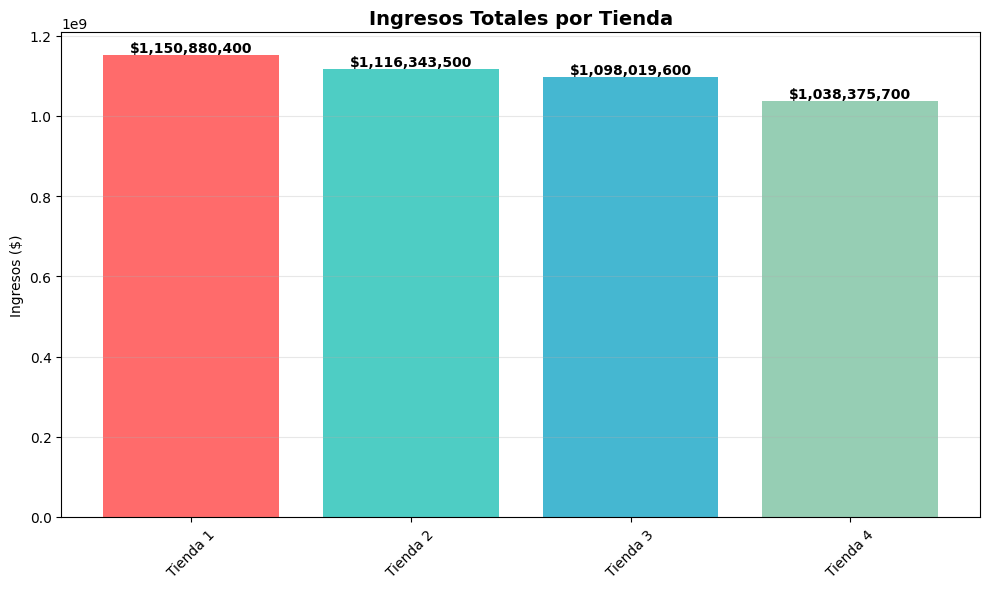

In [23]:
# Gráfico de barras para comparar facturación
plt.figure(figsize=(10, 6))
bars = plt.bar(facturacion.keys(), facturacion.values(),
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.title('Ingresos Totales por Tienda', fontweight='bold', fontsize=14)
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Agregar los valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom',
             fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()